In [1]:
from time import time
import pandas as pd

# Loading AWS Credentials
<span style="color:red">**THIS ONLY APPLIES TO ON-PREM (LOCAL) ACCESS TO S3 DATA. IF YOU ARE ON SAGEMAKER DON'T DO THIS.**

AWS credentials must be stored in environment variables.

To access competition data on-premise, you will need these environment variables set. They expire occasionally, so please update your variables when you get permission errors. See instructions PDF on how to obtain them.

Variables: `AWS_ACCESS_KEY_ID`, `AWS_SECRET_ACCESS_KEY`, and `AWS_SESSION_TOKEN`

If these are not set, you will get a "Forbidden" error. Configuring this depends on your operating system. It needs to be set in your global environment or within your virtual environment **before** launching Jupyter server or scripts. It is usually set using terminal. AWS SSO logins provides a convenient way to copy these for your account into your terminal or command-prompt. It will look something like this:


| **Linux / UNIX / MacOS**                                | **Windows**                                        |
|:--------------------------------------------------------|---------------------------------------------------:|
| `export AWS_ACCESS_KEY_ID="your_access_key"`            | `SET AWS_ACCESS_KEY_ID=your_access_key`            |
| `export AWS_SECRET_ACCESS_KEY="your_secret_access_key"` | `SET AWS_SECRET_ACCESS_KEY=your_secret_access_key` |
| `export AWS_SESSION_TOKEN="your_long_session_token"`    | `SET AWS_SESSION_TOKEN=your_long_session_token`    |

After credentials are set, we can read data from the S3 buckets just like we are on SageMaker environment.

# Reading Cloud Wells into Pandas DataFrame
With the configuration above, now we can use the built in `pandas.read_json()`
function to download and deserialize the `*.json` files into `pandas.DataFrame()`.

We don't need to specify `s3_options` for `pandas.read_json` because credentials are already loaded into the environment variables.

In [2]:
s3_path = 's3://sagemaker-gitc2021/poseidon/wells/poseidon_geoml_training_wells.json.gz'

start_time = time()
well_data = pd.read_json(
    path_or_buf=s3_path,
    compression='gzip'
)

well_data.set_index(['well_id', 'twt'], inplace=True)

print(f"Completed read in {time() - start_time:.2f} seconds")

Completed read in 10.33 seconds


# Data Description
We can look at the raw data:

In [3]:
well_data

tvdss     inline      xline    gamma   rshal    rdeep  \
well_id twt                                                                 
well_01 1136.5  2798.4675  2992.8834  2202.6259   8.6726  3.7827   2.2789   
        1137.0  2798.4723  2992.8834  2202.6259   8.6323  3.7982   2.2860   
        1137.5  2798.4771  2992.8834  2202.6258   8.5921  3.8136   2.2931   
        1138.0  2798.4819  2992.8834  2202.6258   8.5518  3.8290   2.3002   
        1138.5  2798.4867  2992.8834  2202.6258   8.5115  3.8445   2.3073   
...                   ...        ...        ...      ...     ...      ...   
well_33 3275.5  4930.9019  3184.5065  2347.5496  25.9762     NaN   1.2904   
        3276.0  4931.7274  3184.5094  2347.5584  32.2211     NaN   0.3794   
        3276.5  4932.5529  3184.5122  2347.5671  24.3830     NaN   0.6208   
        3277.0  4933.3784  3184.5150  2347.5758  32.3072     NaN   7.0806   
        3277.5  4934.2090  3184.5178  2347.5846  44.1339     NaN  17.5096   

                  nphi     cal    rhob      dtc       dts  
well_id twt                                                
well_01 1136.5     NaN     NaN     NaN  58.3867       NaN  
        1137.0     NaN     NaN     NaN  58.4215       NaN  
        1137.5     NaN     NaN     NaN  58.4564       NaN  
        1138.0     NaN     NaN     NaN  58.4912       NaN  
        1138.5     NaN     NaN     NaN  58.5260       NaN  
...                ...     ...     ...      ...       ...  
well_33 3275.5  3.9099  5.8378  2.5694  67.4372  104.0350  
        3276.0  3.5481  5.8382  2.5828  72.2925  109.3575  
        3276.5  2.5321  5.8363  2.4341  68.8159  104.5286  
        3277.0  3.0198  5.8567  2.3997  71.4051  105.4713  
        3277.5  5.1812  5.8652  2.4335      NaN       NaN  

[14824 rows x 11 columns]

Get some statistics:

In [4]:
well_data.describe()

,tvdss,inline,xline,gamma,rshal,rdeep,nphi,cal,rhob,dtc,dts
count,14824.000000,14824.000000,14824.000000,14190.000000,13319.000000,13129.000000,6057.000000,6402.000000,5890.000000,14128.000000,4605.000000
mean,3835.716897,2763.672636,2174.838334,52.503784,10.916187,15.815763,22.159524,7.861273,2.554026,77.769499,151.620102
std,763.584958,664.046012,327.211822,42.136912,74.827346,226.885290,9.485433,1.466061,0.118349,12.889216,41.148779
min,2478.476200,1193.294400,1490.623300,0.000000,0.214500,0.110300,1.487000,3.810800,1.442600,44.136600,74.608600
25%,3058.992275,2766.629700,2202.617800,14.519350,1.520100,1.557500,15.757400,6.761875,2.501625,67.635100,116.142700
50%,3941.296500,2992.712050,2285.735600,44.121450,2.439000,2.398500,22.722700,8.558250,2.552200,75.623700,147.974300
75%,4456.250325,2993.014750,2397.199250,85.380275,4.539750,4.703800,27.792200,8.651000,2.616400,87.356375,177.851000
max,5312.898000,3523.953900,2517.695300,522.917900,1950.000000,23933.948400,64.952400,17.223100,3.446700,161.283200,269.232400


# Plotting Wells and Scatterplot Matrix

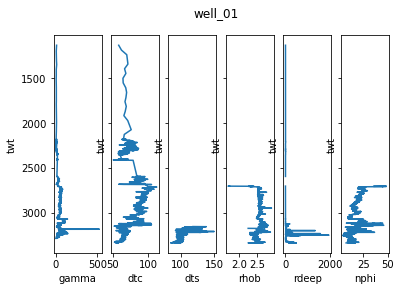

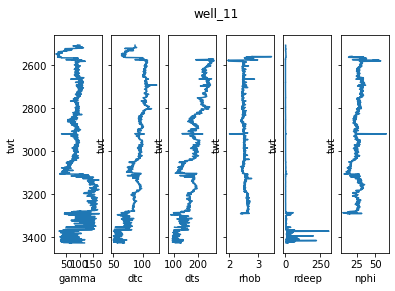

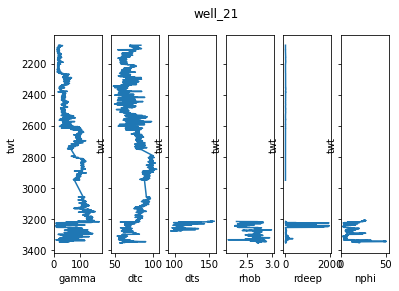

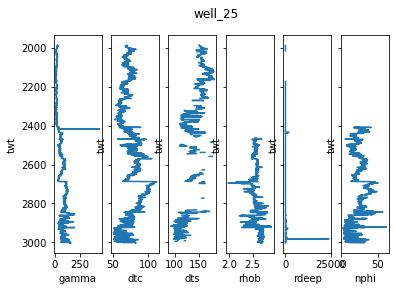

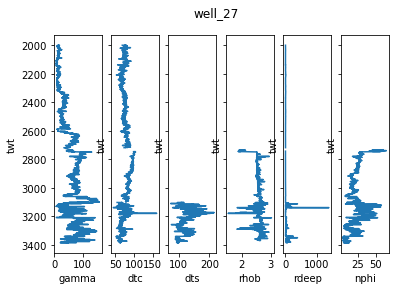

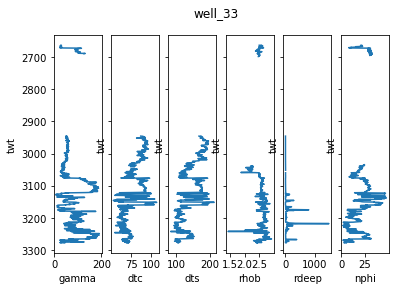

In [5]:
import matplotlib.pyplot as plt

for well in well_data.index.levels[0]:
    fig, ax = plt.subplots(1, 6, sharey='all')
    curves = well_data.loc[well][['gamma', 'dtc', 'dts', 'rhob', 'rdeep', 'nphi']]
    fig.suptitle(well)
    for idx, curve in enumerate(curves.columns):
        ax[idx].plot(curves[curve], curves[curve].index)
        ax[idx].set_ylabel(curves[curve].index.name)
        ax[idx].set_xlabel(curves[curve].name)

    ax[0].invert_yaxis()

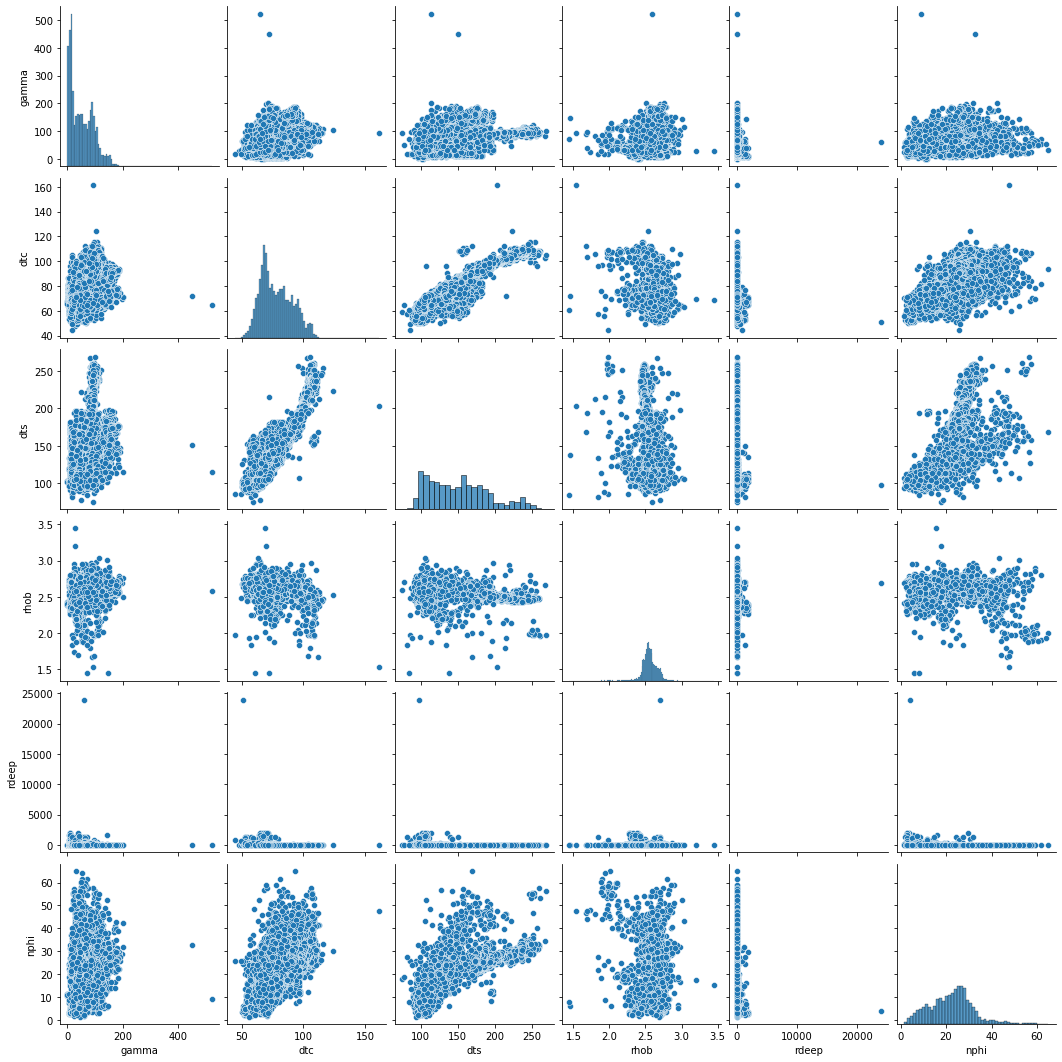

In [6]:
import seaborn as sns
pairplot = sns.pairplot(well_data[['gamma', 'dtc', 'dts', 'rhob', 'rdeep', 'nphi']])